
# Today's topic: T-tests vs. Permutation Tests

<br />So. Which one is better?
<br />Who knows, so let the BATTLE ROYALE begin.
<br />Or more correctly put - which test provides a better characterization of the data? How do we show what these datasets tell us better?

What we did here:
<br />Say we have two datasets that are borderline different / significant at p = 0.05.
<br />Our question is - are these datasets significantly different really/like srsly/IRL?
<br />So we're going to simulate an extreme case with small sample sizes. 

**First**, we do a t-test. Well, we simulate a t-test:
<br />We have a dataset A that has a mean of 1.24 and a standard deviation of 1.75, with a N = 10.
<br />Then we have another dataset B that has a mean of 1.78 and a standard deviation of 1.1, with a N = 15.

p.s. Obv. SPSS can't do this, because it don't do different Ns. #python-FTW

When doing t-tests, we have to assume:

1. independent sampling (every single subject is randomly sampled, aka, subject 1 and subject 2 and subject 3 are independently sampled. but they're not a lot of the times. but we can't do anything about dis. meh, aka in psychology terms, wutever.)

2. normalization, aka normal distribution (personal note: I don't think any of the stuff we test is normal a lot of the times, but let's thank Fisher's gargantuan legacy and the lazy posterity children that we are for just going with the flow)

3. equal variance (we can assume both cases: equal and non-equal variance, so we will below (because we be thorough))

/beginrant
<br />So what this means is that, in using t-tests, we generally and literally violate every single assumption in any psych/neuro/#FAKE-scientific study we do. 
<br />So why do we use t-tests?
<br />Because there are no better alternatives. p.s. but it don't have to be. We are the purveyors of dis light, the deus ex machina of your statistical nonchalance.
<br />/endrant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

from sklearn.model_selection import permutation_test_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

from random import shuffle

# T-test

Simulating datasets A and B, and making sure that they match teh criteria:

1. p value be close to like .05, like reallllllllllllly #fracking close (less than .001 difference)
2. all the data points in dataset A are positive
3. all the data points in dataset B are positive

Criteria 2 and 3 make sure that we don't have a normal distribution. Explanation: when mean is 1.24 and the standard deviation is 1.75, how. do. they. not. have. some. negative. data. points. amirite?

The reason why we did this is to make sure that we have data that violate the assumptions of doing t tests.

Reason why Ning was forced to use blue and yellow instead of blue and red like a normal human being:

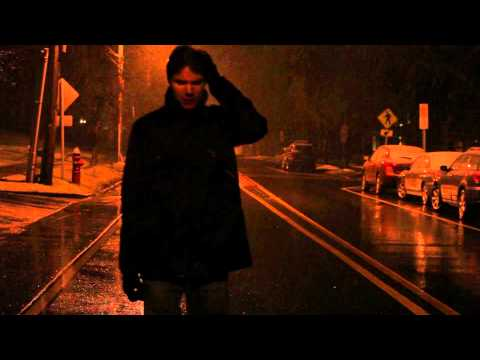

In [2]:
import IPython.display as dis

dis.YouTubeVideo("Jwjj5gowpLA",start=41)

ANYWAY, **results, results, results**. 
<br />You can see on the Results + Blue-And-Yellow coloured figure that we have generated two sets of data (datasets A and B) and t-tested them.
<br />You can also see that assuming equal variance and non-equal variance changes the statistical significance of the difference between the datasets A and B. #told-you-so #assumptions-matter

Results: 
 non-equal variance, t(9) = -2.07, p = 0.050 
 equal variance, t(14) = -1.99, p = 0.059


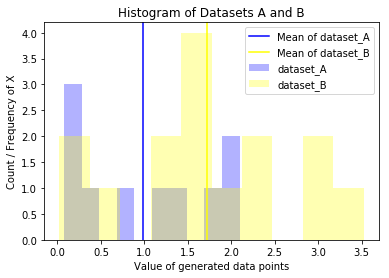

In [3]:
p = 1

for iii in range(int(1e20)):

    dataset_A = np.random.normal(1.24, 1.75, 10)
    dataset_B = np.random.normal(1.78, 1.1, 15)
    t_stats , p = stats.ttest_ind(dataset_A, dataset_B, equal_var = False)
    if (abs(p - 0.05) < 0.001) & ((dataset_A > 0).all()) & ((dataset_B > 0).all()):
        break
        
a,b = stats.ttest_ind(dataset_A, dataset_B, equal_var = False)  
c,d = stats.ttest_ind(dataset_A, dataset_B, equal_var = True)

print('Results:','\n','non-equal variance, t(9) = %.2f, p = %.3f'%(a,b),'\n',
      'equal variance, t(14) = %.2f, p = %.3f'%(c,d))

fig,ax = plt.subplots()
ax.hist(dataset_A,color = "blue", alpha = .3, label = 'dataset_A')
ax.hist(dataset_B,color = "yellow", alpha = .3, label = 'dataset_B')
ax.axvline(dataset_A.mean(), label = 'Mean of dataset_A', color = 'blue')
ax.axvline(dataset_B.mean(), label = 'Mean of dataset_B', color = 'yellow')
ax.legend(loc = "best")
ax.set(title = "Histogram of Datasets A and B", xlabel = "Value of generated data points", 
       ylabel = "Count / Frequency of X")

# Permutation Test

**Second**, we do a permutation test (using scikit-learn).

huh and wat? Permutation test = resampling = get all the data points from datasets A and B and exchange the labels on each data point (e.g. say a data point from dataset A is 1.1, this data point could be labeled as being in dataset B or A when resampled) many many times.

This will generate a distribution of randomized labels on the data points. It's like exploring the "What if the data points weren't labeled as belonging to dataset A or B?"

Another frame of reference in understanding just what in the hell we're doing is through the combinations formula that we slept through in high school:

$$C(n,r) = C(25,10)$$
$$ $$
$$= \frac{25!}{10!(25-10)!}$$
$$ $$
$$=3,268,760$$

Given that dataset A has a N = 10 and dataset B has a N = 15, we have a total n (objects) = 10 + 15 = 25 , and a r (sample) of 10 , which means that we choose 10 of them to be label A. Watever is left is gonna be label B. The order doesn't matter, thus the combinations formula, and not the permutation formula.

But I only have a macbook, and not some Watson so ima just run 1,000 permutations and not 3 million and change permutations. They don't make much difference, and if you don't believe me, bug Ning, not me.

Note. As we increase group sizes: from only 2 groups to 3 or more, we don't necessarily increase the number of permutations a lot (like from 1,000 to 1,000,000) only for approximation. Rather, we increase the number or permutations based on both computation power and the log(combination formula) * 100. 

**The significance of all this rambling is that we have one assumption - independent sampling, which is the foundation of modern maths.**

Unlike most parametric tests (which includes the high school quarterback t-test that we all admired but secretly wanted to ditch in a river bank), we don't assume any gender, sexual orientation, and most importantly normalization and equal variance.

So how do we do dis?

<br />First, we have to do some preprocessing. 
1. p.s. Yo. So, a small note. Many peeps don't know or realize that 99.9999% of the work involved in ML (machine learning) is p.r.e.p.r.o.c.es.s.ing. t.eh. da.t.a. This is super important. credit: Ning "It's simple, but important."
2. The idea behind preprocessing for dis is that we formulate a statistical problem into a classification problem. In classification, the feature will be the data we have, and the label is what we generate for each group.
3. In principle, we don't have to shuffle the data, but to make the classification test more robust, we could shuffle our small sample size dataset 100 times as we did and feed them into the machine learning model (logistic regression). p.s. feel free to use other models. Idc. aka random forest etc etc.
4. Before we define a machine learning model, we need to define how we are going to cross validate the model and how we are going to measure the cross validation results. Here, we use `StratifiedKFold` for cross validation with 5 folds. This cross-validation method is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.
5. For simplicity, we use logistic regression for the machine learning model. Thus my p.s. comment in #3.
6. [Cross validation is not something I can explain now, because it's Sunday and I'm really tired doing this instead of I dunno, doing anything else? now](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) Kapish? Gud.

In [4]:
# preprocessing
label1 = np.zeros(dataset_A.shape)
label2 = np.ones(dataset_B.shape)
data = np.concatenate([dataset_A,dataset_B])
label = np.concatenate([label1,label2])

# https://youtu.be/KQ6zr6kCPj8?t=3m39s
idx = np.arange(len(data))
for ii in range(100):
    shuffle(idx)
    
data = data[idx]
label = label[idx]

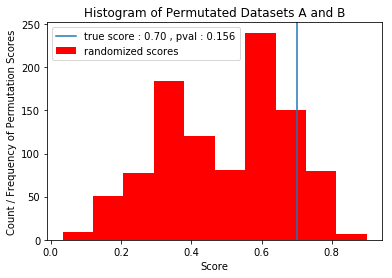

In [5]:
#let's define the machine learning model and the cross validation method
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12345)
clf = LogisticRegression(random_state = 12345)
score, permutation_score, pval = permutation_test_score(clf, data.reshape(-1,1), label,
                                                        n_permutations = 1000, cv = cv,
                                                        random_state = 12345, scoring = 'roc_auc')

fig,ax = plt.subplots()
ax.hist(permutation_score, label = 'randomized scores', color = "red")
ax.axvline(score, label = 'true score : %.2f , pval : %.3f'%(score, pval))
ax.legend()
ax.set(title = "Histogram of Permutated Datasets A and B", xlabel = "Score", 
       ylabel = "Count / Frequency of Permutation Scores")

So. **Results** for permutating away my free Sunday night:

T-test results from above:  
 non-equal variance, t(9) = -2.07, p = 0.050 
 equal variance, t(14) = -1.99, p = 0.059
 
Compared to the T-test results, what we see here is that the classification is not significant at the p = 0.05 level in telling the difference between datasets A and B. The blue line is at AUC = 0.70, which means that it can't classify Mr. Jack aka the permutated data points don't separate out datasets A and B with logistic regression to a satisfying post-Thanksgiving level.

Conclusion: it could be that 
<br />Explanation A. the logistic regression is not powerful enough, or 
<br />Explanation B. the data itself is shitty, and t test is doing a very unreliable job.

So let's try Random Forest:

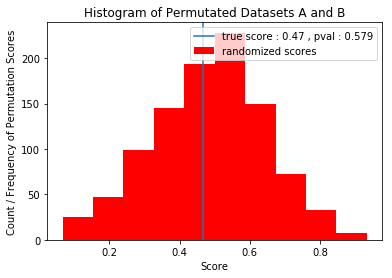

In [6]:
from sklearn.ensemble import RandomForestClassifier
#let's define the machine learning model and the cross validation method
cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12345)
clf = RandomForestClassifier(random_state = 12345)
score, permutation_score, pval = permutation_test_score(clf, data.reshape(-1,1), label,
                                                        n_permutations = 1000, cv = cv,
                                                        random_state = 12345, scoring = 'roc_auc')

fig,ax = plt.subplots()
ax.hist(permutation_score, label = 'randomized scores', color = "red")
ax.axvline(score, label = 'true score : %.2f , pval : %.3f'%(score, pval))
ax.legend()
ax.set(title = "Histogram of Permutated Datasets A and B", xlabel = "Score", 
       ylabel = "Count / Frequency of Permutation Scores")

AUC = 0.47, lol. Told. Ya.

Next lesson, we'll be comparing RM-ANOVA vs. many permutation tests.
Which is what began this wholly incomplete and dubiously helpful project in the first place.
Thank you.


p.s. but when all things are said and done, all this stuff don't matter because we're not even close to understanding the structure of the brain, even using fancy things like [neuro-topology](http://journal.frontiersin.org/article/10.3389/fncom.2017.00048/full). The end.